# RATIO ANALYSIS OF BEST SECTOR# 

## Import Libraries, Make auto correct quick , Ignore warnings, Convert exponencial to Numeric##

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import statistics as st
import pandas as pd
import seaborn as sns
%config Completer.use_jedi = False #For make the auto correct fast
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

## Importing File from Directory##

In [4]:
os.chdir(r'C:/Users/gsrih/Desktop/Python for data Science')
df_fdz=pd.read_csv('Financial_Data.csv')

## Displaying all Rows and Columns##

**The below row would display all rows and columns while execution**

***I havent run the below code because while downloading it in .html it is filled mostly with large table.***


In [3]:
#pd.options.display.max_columns=None
#pd.options.display.max_rows=None

**Finding the total number of rows and columns 
We also get the total diffrent data types**

In [5]:
df_fdz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 7.5+ MB


**Checking the dataframe and its values**

In [6]:
df_fdz.head(5)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,94507000000.00,0.11,0.00,94507000000.00,0.00,64822000000.00,75498000000.00,19009000000.00,3542000000.00,...,0.26,0.00,0.34,0.07,0.73,0.00,0.13,Consumer Cyclical,32.79,1
1,KMI,14144000000.00,0.03,7288000000.00,6856000000.00,0.00,601000000.00,3062000000.00,3794000000.00,1917000000.00,...,0.03,-0.09,-0.00,0.01,-0.01,0.00,-0.13,Energy,40.59,1
2,INTC,70848000000.00,0.13,27111000000.00,43737000000.00,13543000000.00,6750000000.00,20421000000.00,23316000000.00,-126000000.00,...,0.20,0.04,0.04,0.10,-0.02,0.04,-0.09,Technology,30.30,1
3,MU,30391000000.00,0.50,12500000000.00,17891000000.00,2141000000.00,813000000.00,2897000000.00,14994000000.00,342000000.00,...,0.46,0.15,0.23,0.64,-0.58,0.17,0.09,Technology,64.21,1
4,GE,121615000000.00,0.03,95461000000.00,26154000000.00,0.00,18111000000.00,40711000000.00,-14557000000.00,5059000000.00,...,-0.28,-0.29,-0.16,-0.45,-0.23,0.00,0.03,Industrials,44.76,1


In [7]:
df_fdz.dtypes

Unnamed: 0               object
Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
                         ...   
R&D Expense Growth      float64
SG&A Expenses Growth    float64
Sector                   object
2019 PRICE VAR [%]      float64
Class                     int64
Length: 225, dtype: object

**Converting the "Class" table which is integer to the object.**

**Checking if all the columns headers are present.**

In [8]:
df_fdz.columns.values.tolist()

['Unnamed: 0',
 'Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt'

**If the columns headers are not present we will replace it with required one.**

**Here we have replaced the empty column header with "Tickers" because these are financial data listed and these are called
as tickers in financial terms.**

In [9]:
df_fdz.rename(columns = {'Unnamed: 0':'Tickers'}, inplace = True)

**Checking the column headers are replacing.**

In [10]:
df_fdz.columns.values.tolist()

['Tickers',
 'Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 

**Checking the total no of tickers with respect to the sector wise
We have also plotted a bargraph for the Pictorial representation.**

**Here we have the maximum number of company tickers in Financial sector, followed by healthcare.**


Financial Services        824
Healthcare                691
Technology                636
Industrials               574
Consumer Cyclical         506
Basic Materials           276
Real Estate               255
Energy                    248
Consumer Defensive        191
Utilities                 102
Communication Services     89
Name: Sector, dtype: int64

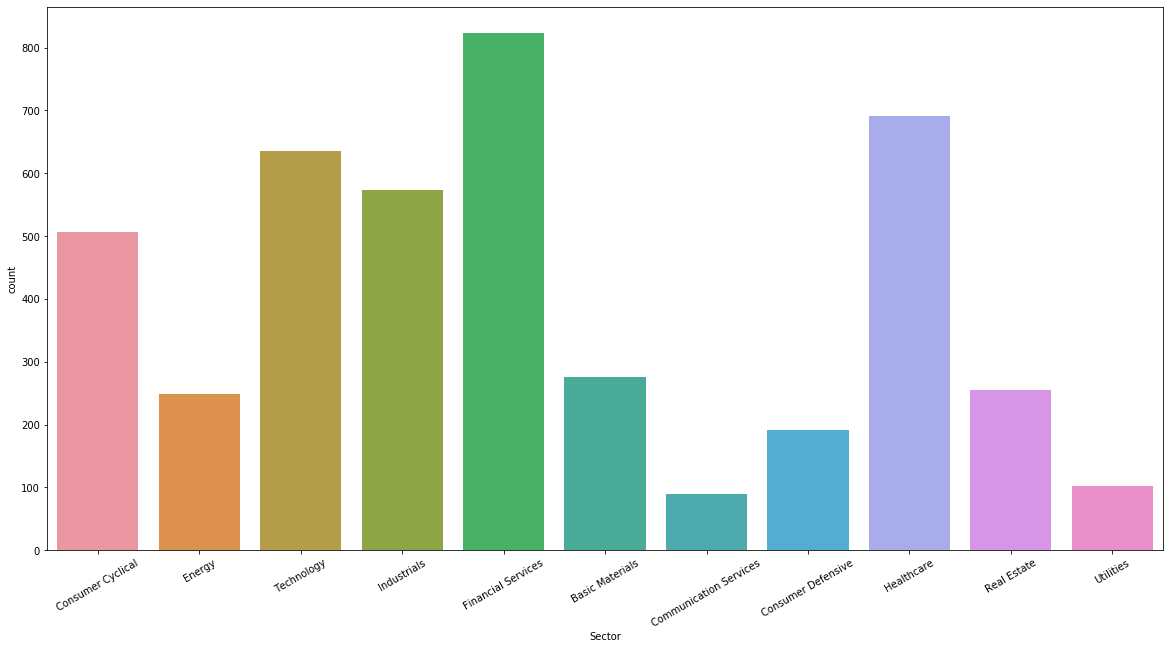

In [11]:
plt.figure(figsize = (20,10))
plot = sns.countplot(df_fdz['Sector'])

plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
df_fdz.Sector.value_counts()

## Checking the missing values in the columns

**We have creating for loop where we found the percentage of the missing values in the each column.**


In [12]:
null_values=df_fdz.isnull().sum()
for i,k in null_values.items():
    if k>0:
        print(i,'has',np.round(k/len(df_fdz)*100,1),'% missing values')
    
    else:
        continue

Revenue has 1.0 % missing values
Revenue Growth has 3.2 % missing values
Cost of Revenue has 4.2 % missing values
Gross Profit has 1.5 % missing values
R&D Expenses has 5.4 % missing values
SG&A Expense has 3.8 % missing values
Operating Expenses has 4.2 % missing values
Operating Income has 0.8 % missing values
Interest Expense has 4.2 % missing values
Earnings before Tax has 1.6 % missing values
Income Tax Expense has 3.2 % missing values
Net Income - Non-Controlling int has 5.7 % missing values
Net Income - Discontinued ops has 5.7 % missing values
Net Income has 3.4 % missing values
Preferred Dividends has 5.7 % missing values
Net Income Com has 2.7 % missing values
EPS has 1.5 % missing values
EPS Diluted has 1.4 % missing values
Weighted Average Shs Out has 1.5 % missing values
Weighted Average Shs Out (Dil) has 4.6 % missing values
Dividend per Share has 5.7 % missing values
Gross Margin has 1.2 % missing values
EBITDA Margin has 7.0 % missing values
EBIT Margin has 4.0 % missin

## Removing the columns which have missing values more than 60%

**In the data science, when the columns are having the missing values more than 60%, those columns could be removed.**

**In here we found two columns 'operatingCycle', 'cashConversionCycle'.**

In [13]:
missing_df = df_fdz.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index()
miss_60 = list(missing_df[missing_df.missing_value >= 0.6*df_fdz.shape[0] ]['index'])
print('Total missing values = ',len(miss_60))
miss_60

Total missing values =  2


['operatingCycle', 'cashConversionCycle']

**The two columns have been dropped.**

In [14]:
df_fdz.drop(miss_60, axis = 1, inplace = True)

**Confirming the data if the columns have been dropped.**

In [15]:
df_fdz.shape

(4392, 223)

## Finding the top growing sector.
**In the dataframe we have found the Revenue Growth, Operating CF Growth, Net Income Growth, Shareholders Equity Growth
and Dividend per Share for the 10, 5 and 3 years. By taking its mean of diffrenrent sectors,
we could determine its performance.**


In [16]:
df_sector_mean=df_fdz.groupby('Sector')[ '10Y Revenue Growth (per Share)',
 '5Y Revenue Growth (per Share)',
 '3Y Revenue Growth (per Share)',
 '10Y Operating CF Growth (per Share)',
 '5Y Operating CF Growth (per Share)',
 '3Y Operating CF Growth (per Share)',
 '10Y Net Income Growth (per Share)',
 '5Y Net Income Growth (per Share)',
 '3Y Net Income Growth (per Share)',
 '10Y Shareholders Equity Growth (per Share)',
 '5Y Shareholders Equity Growth (per Share)',
 '3Y Shareholders Equity Growth (per Share)',
 '10Y Dividend per Share Growth (per Share)',
 '5Y Dividend per Share Growth (per Share)',
 '3Y Dividend per Share Growth (per Share)'].mean()
df_sector_mean

,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share)
Sector,,,,,,,,,,,,,,,
Basic Materials,-0.02,-0.03,0.00,0.04,0.04,0.07,0.04,0.04,0.09,0.02,-0.00,0.05,-0.06,-0.04,0.01
Communication Services,0.04,0.04,0.02,0.06,0.05,0.06,0.03,0.03,0.05,0.05,0.09,0.07,-0.13,-0.09,-0.03
Consumer Cyclical,0.04,0.05,0.05,0.05,0.06,0.08,0.05,0.07,0.11,0.04,0.04,0.04,-0.04,-0.01,0.03
Consumer Defensive,0.05,0.05,0.05,0.06,0.06,0.05,0.06,0.07,0.07,0.07,0.08,0.11,-0.03,-0.07,-0.02
Energy,-0.03,-0.05,0.02,-0.03,-0.05,0.03,0.00,0.02,0.07,-0.01,-0.05,0.06,-0.07,-0.07,-0.07
Financial Services,0.04,0.08,0.08,0.04,0.04,0.12,0.06,0.08,0.13,0.04,0.06,0.08,-0.02,0.05,0.07
Healthcare,-0.01,-0.02,0.06,0.03,0.03,0.04,0.02,0.03,0.02,0.01,-0.02,-0.05,-0.00,-0.01,-0.01
Industrials,0.01,0.02,0.02,0.03,0.05,0.04,0.03,0.05,0.10,0.04,0.04,0.05,-0.05,-0.02,-0.03
Real Estate,-0.01,0.05,0.07,0.03,0.07,0.05,0.04,0.10,0.07,0.02,0.03,0.06,-0.01,0.02,0.02


In [17]:
df_revenue_growth = df_sector_mean.loc[:,['10Y Revenue Growth (per Share)','5Y Revenue Growth (per Share)','3Y Revenue Growth (per Share)']]
df_Operating_CFgrowth = df_sector_mean.loc[:,['10Y Operating CF Growth (per Share)','5Y Operating CF Growth (per Share)','3Y Operating CF Growth (per Share)']]
df_Netincomegrowth = df_sector_mean.loc[:,['10Y Net Income Growth (per Share)','5Y Net Income Growth (per Share)','3Y Net Income Growth (per Share)']]
df_Shareholdersequity = df_sector_mean.loc[:,['10Y Shareholders Equity Growth (per Share)','5Y Shareholders Equity Growth (per Share)','3Y Shareholders Equity Growth (per Share)']]
df_dividendpershare = df_sector_mean.loc[:,['10Y Dividend per Share Growth (per Share)','5Y Dividend per Share Growth (per Share)','3Y Dividend per Share Growth (per Share)']]


**We have plotted the grouped bar graph, so that we could easily determine the growth in performance**

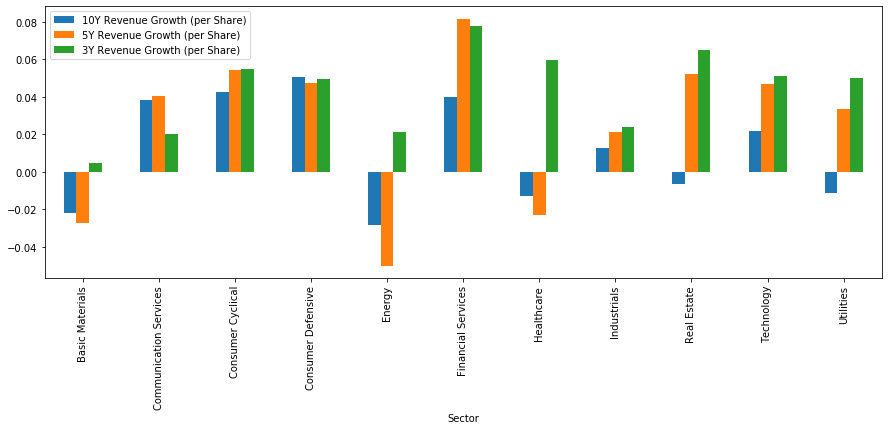

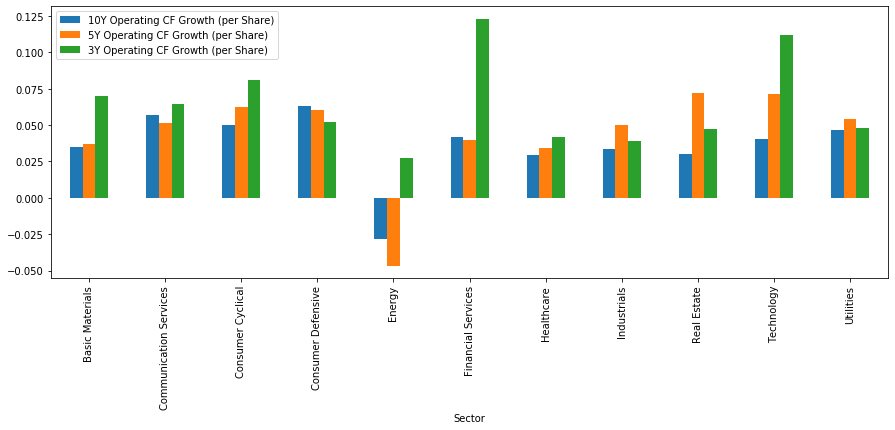

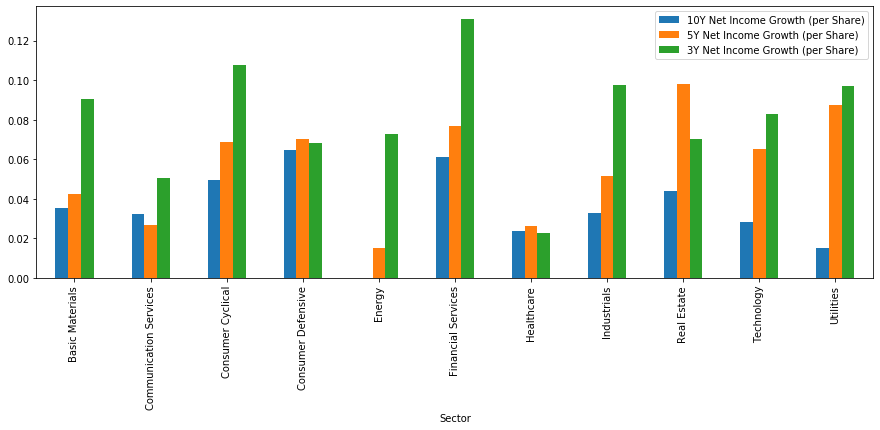

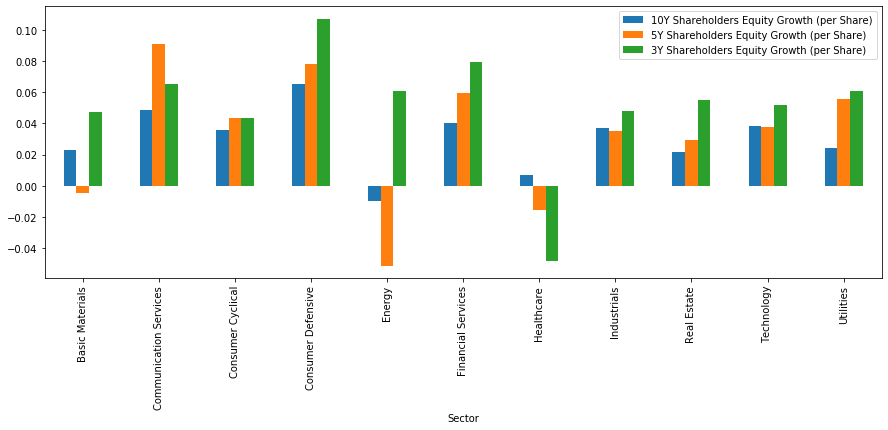

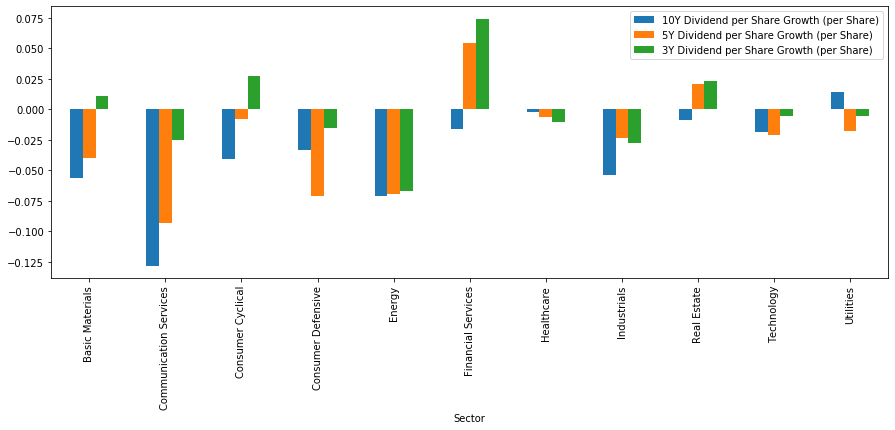

In [18]:
df_revenue_growth.plot(kind='bar',figsize=(15,5))
df_Operating_CFgrowth.plot(kind='bar',figsize=(15,5))
df_Netincomegrowth.plot(kind='bar',figsize=(15,5))
df_Shareholdersequity.plot(kind='bar',figsize=(15,5))
df_dividendpershare.plot(kind='bar',figsize=(15,5))
plt.show()

**By analysig the graph we can determine the best performing industry is the ‘Financial Services’ .**

**So we have filtered the ‘Financial Services’ sector and the required ratios for the analysis.**

In [21]:
is_finservice = df_fdz['Sector']=='Financial Services'
df_fin_servicesall = df_fdz[is_finservice]
df_fin_services=  df_fin_servicesall.filter(['Tickers','dividendYield','currentRatio','assetTurnover',"debtEquityRatio",'quickRatio','Enterprise Value over EBITDA','PE ratio','returnOnEquity','Class'],axis=1)
df_fin_services

,Tickers,dividendYield,currentRatio,assetTurnover,debtEquityRatio,quickRatio,Enterprise Value over EBITDA,PE ratio,returnOnEquity,Class
5,BAC,0.03,0.41,0.04,1.65,0.41,0.00,9.33,0.11,1
16,WFC,0.04,0.28,0.04,1.71,0.12,11.25,10.69,0.11,1
17,AIG,0.03,0.62,0.10,0.61,0.22,8.34,0.00,-0.00,1
19,C,0.04,0.51,0.04,2.25,0.43,0.00,7.78,0.09,1
21,MS,0.04,1.76,0.05,2.48,0.39,0.00,8.24,0.11,1
...,...,...,...,...,...,...,...,...,...,...
4364,VRTSP,nan,nan,nan,nan,nan,nan,nan,nan,1
4370,WCFB,0.02,nan,0.03,0.88,0.19,27.62,91.56,0.01,1
4371,WEBK,0.01,0.06,0.03,1.28,0.06,12.38,11.14,0.09,1
4376,WINS,0.00,5.83,0.05,0.07,9.90,nan,156.60,0.04,0


# Data Cleaning

**Finding the missing values percentage in the columns**

**The highest missing values are 'Enterprise Value over EBITDA'**

In [22]:
null_values=df_fin_services.isnull().sum()
for i,k in null_values.items():
    if k>0:
        print(i,'has',np.round(k/len(df_fin_services)*100,1),'% missing values')
    
    else:
        print('No values are missing')

No values are missing
dividendYield has 18.3 % missing values
currentRatio has 20.1 % missing values
assetTurnover has 18.3 % missing values
debtEquityRatio has 18.3 % missing values
quickRatio has 19.9 % missing values
Enterprise Value over EBITDA has 25.8 % missing values
PE ratio has 18.4 % missing values
returnOnEquity has 18.6 % missing values
No values are missing


In [23]:
df_fin_services.describe()

,dividendYield,currentRatio,assetTurnover,debtEquityRatio,quickRatio,Enterprise Value over EBITDA,PE ratio,returnOnEquity,Class
count,673.00,658.00,673.00,673.00,660.00,611.00,672.00,671.00,824.00
mean,0.29,4.84,0.19,1.31,5.93,24.44,23.64,16603.76,0.86
std,2.87,72.58,0.51,8.62,123.81,128.83,161.94,430099.00,0.35
min,0.00,0.01,-0.08,-22.89,0.00,0.00,0.00,-72.55,0.00
25%,0.01,0.05,0.04,0.26,0.04,7.12,8.69,0.06,1.00
50%,0.02,0.21,0.05,0.62,0.13,11.05,11.81,0.10,1.00
75%,0.04,1.33,0.19,1.18,1.01,16.68,15.50,0.12,1.00
max,45.77,1853.08,10.24,215.67,3180.81,2500.37,3842.00,11141141.67,1.00


## The missing values will be fill by the median.
**With median because we have when we look at the above the difference between the 75% to max and 25% to min, its very high. 
Because of this the mean would be not accurate. So if we replace it with median of the industry. 
We might be nearer to accurate.**


In [24]:
df_fin_services = df_fin_services.fillna(df_fin_services.median())
df_fin_services

,Tickers,dividendYield,currentRatio,assetTurnover,debtEquityRatio,quickRatio,Enterprise Value over EBITDA,PE ratio,returnOnEquity,Class
5,BAC,0.03,0.41,0.04,1.65,0.41,0.00,9.33,0.11,1
16,WFC,0.04,0.28,0.04,1.71,0.12,11.25,10.69,0.11,1
17,AIG,0.03,0.62,0.10,0.61,0.22,8.34,0.00,-0.00,1
19,C,0.04,0.51,0.04,2.25,0.43,0.00,7.78,0.09,1
21,MS,0.04,1.76,0.05,2.48,0.39,0.00,8.24,0.11,1
...,...,...,...,...,...,...,...,...,...,...
4364,VRTSP,0.02,0.21,0.05,0.62,0.13,11.05,11.81,0.10,1
4370,WCFB,0.02,0.21,0.03,0.88,0.19,27.62,91.56,0.01,1
4371,WEBK,0.01,0.06,0.03,1.28,0.06,12.38,11.14,0.09,1
4376,WINS,0.00,5.83,0.05,0.07,9.90,11.05,156.60,0.04,0


## Removing Outliers 

In [25]:
Q1 = df_fin_services.quantile(0.25)
Q3 = df_fin_services.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

dividendYield                  0.02
currentRatio                   0.89
assetTurnover                  0.07
debtEquityRatio                0.71
quickRatio                     0.60
Enterprise Value over EBITDA   5.70
PE ratio                       4.75
returnOnEquity                 0.04
Class                          0.00
dtype: float64


In [26]:
left_threshold = Q1 - (1.5*IQR)
print(left_threshold)

right_threshold = Q3 + (1.5 * IQR)
print(right_threshold)

dividendYield                  -0.02
currentRatio                   -1.27
assetTurnover                  -0.07
debtEquityRatio                -0.74
quickRatio                     -0.84
Enterprise Value over EBITDA   -0.05
PE ratio                        2.60
returnOnEquity                  0.01
Class                           1.00
dtype: float64
dividendYield                   0.06
currentRatio                    2.28
assetTurnover                   0.22
debtEquityRatio                 2.08
quickRatio                      1.54
Enterprise Value over EBITDA   22.74
PE ratio                       21.62
returnOnEquity                  0.18
Class                           1.00
dtype: float64


In [27]:
df_no_outlier1=df_fin_services[(df_fin_services['dividendYield']>left_threshold['dividendYield'])&(df_fin_services['dividendYield']<right_threshold['dividendYield'])]
df_no_outlier2=df_no_outlier1[(df_no_outlier1['currentRatio']>left_threshold['currentRatio'])&(df_no_outlier1['currentRatio']<right_threshold['currentRatio'])]
df_no_outlier3 = df_no_outlier2[(df_no_outlier2['assetTurnover']>left_threshold['assetTurnover'])&(df_no_outlier2['assetTurnover']<right_threshold['assetTurnover'])]
df_no_outlier4 = df_no_outlier3[(df_no_outlier3['debtEquityRatio']>left_threshold['debtEquityRatio'])&(df_no_outlier3['debtEquityRatio']<right_threshold['debtEquityRatio'])]
df_no_outlier5 =  df_no_outlier4[(df_no_outlier4['quickRatio']>left_threshold['quickRatio'])&(df_no_outlier4['quickRatio']<right_threshold['quickRatio'])]
df_no_outlier6 = df_no_outlier5[(df_no_outlier5['Enterprise Value over EBITDA']>left_threshold['Enterprise Value over EBITDA'])&(df_no_outlier5['Enterprise Value over EBITDA']<right_threshold['Enterprise Value over EBITDA'])]
df_no_outlier7 = df_no_outlier6[(df_no_outlier6['PE ratio']>left_threshold['PE ratio'])&(df_no_outlier6['PE ratio']<right_threshold['PE ratio'])]
df_fin_no_out =  df_no_outlier7[(df_no_outlier7['quickRatio']>left_threshold['quickRatio'])&(df_no_outlier7['quickRatio']<right_threshold['quickRatio'])]
df_fin_no_out

,Tickers,dividendYield,currentRatio,assetTurnover,debtEquityRatio,quickRatio,Enterprise Value over EBITDA,PE ratio,returnOnEquity,Class
5,BAC,0.03,0.41,0.04,1.65,0.41,0.00,9.33,0.11,1
16,WFC,0.04,0.28,0.04,1.71,0.12,11.25,10.69,0.11,1
23,JPM,0.03,0.56,0.04,2.08,0.32,5.51,10.80,0.12,1
45,KEY,0.04,0.05,0.04,0.94,0.01,11.27,8.54,0.12,1
46,RF,0.03,0.05,0.04,0.93,0.05,8.96,8.63,0.11,1
...,...,...,...,...,...,...,...,...,...,...
4352,UNTY,0.01,0.12,0.04,1.59,0.10,10.20,10.18,0.16,1
4359,VBFC,0.00,0.07,0.05,0.95,0.04,13.35,14.93,0.08,1
4360,VCF,0.02,0.21,0.05,0.62,0.13,11.05,11.81,0.10,1
4364,VRTSP,0.02,0.21,0.05,0.62,0.13,11.05,11.81,0.10,1


**There is reduction of rows from 824 to 465. 
That means 359 companies are the outliers.
The mean, standard deviation, Kurtosis and Skewness are very sensitive to the outliers.
SO removing them would help us in anlysing.**

In [28]:
df_fin_no_out.shape

(465, 10)

In [29]:
df_fin_no_out.dtypes

Tickers                          object
dividendYield                   float64
currentRatio                    float64
assetTurnover                   float64
debtEquityRatio                 float64
quickRatio                      float64
Enterprise Value over EBITDA    float64
PE ratio                        float64
returnOnEquity                  float64
Class                             int64
dtype: object

**Replacing the values of class 1 with A and class 0 with B
Because in stock market there are stock related to Class A and Class B.**`

In [30]:
df_fin_no_out['Class'] = df_fin_no_out['Class'].replace({1: 'A',0:'B'})

**Finding out the count of tickers depending on the class.
We got Class 1 of 435 comapnies and 
Class 2 fo 30 companies**

In [31]:
df_fin_no_out_c = df_fin_no_out.groupby('Class')['Tickers'].nunique()
df_fin_no_out_c


Class
A    435
B     30
Name: Tickers, dtype: int64

# Correlation between the ratios of the Financial sector companies

**We have grouped the correlation of the different ratios in graphical representation.
But we cannot get proper clarity. 
We found that we have relation between few of the ratio.**


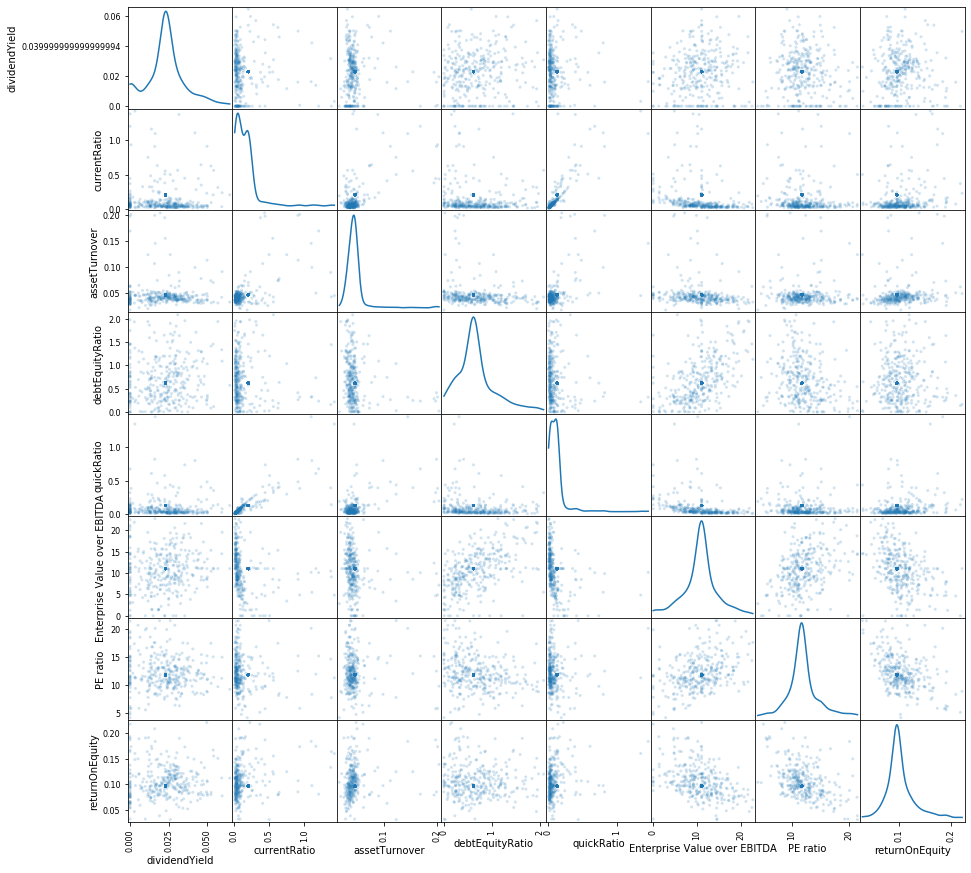

In [32]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_fin_no_out, alpha=0.2, figsize=(15,15), diagonal='kde')
plt.show()

**From heat map we could get much clarity on what all ratios the relation is there.
From heat map we could say that between quick ratio and current ratio we have strong positively correlated.
From that we could interpret that if any company’s quick ratio with change, 
there is positively correlated with current ratio and vice versa 
DebtEquity ratio and Enterprise Value over EBITDA are also strong prositively correlated.
When the DebtEquityratio changes, the Enterprise Value over EBITDA also changes vice-versa. 
The same is for asset turnover and quick ratio positively correlated. 
And the remaining all are weak positive or weak negative correlated.**


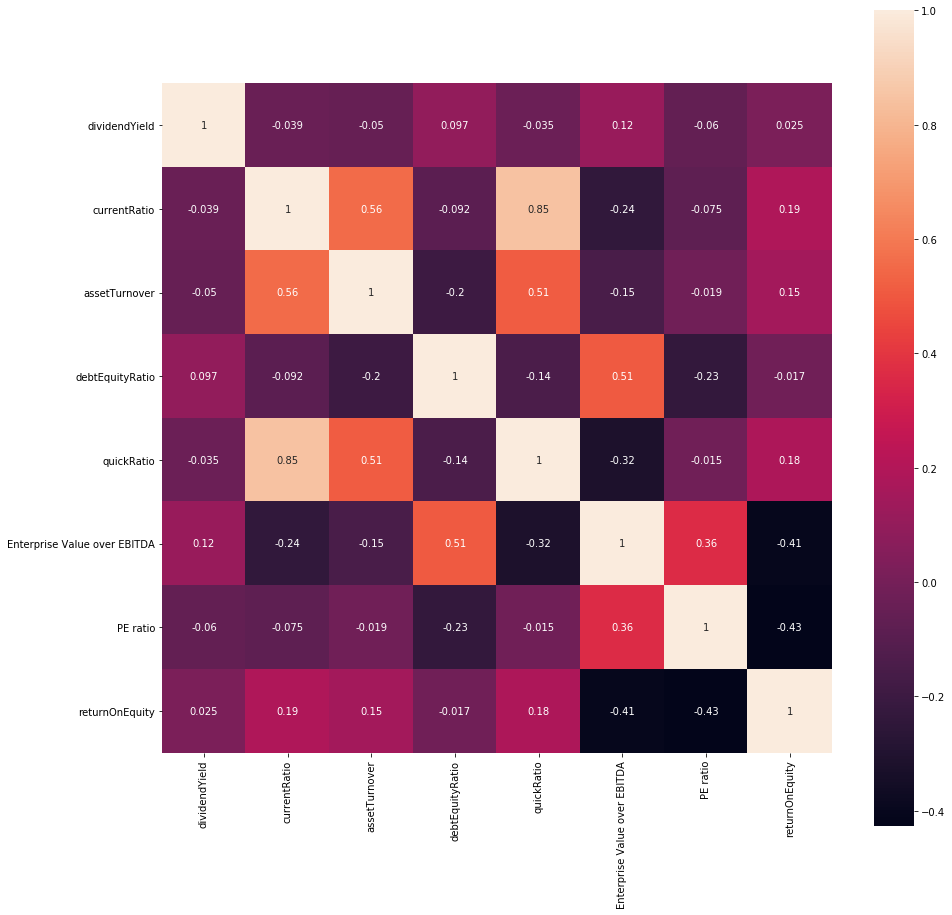

In [33]:
df_fin_no_out_corr = df_fin_no_out.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_fin_no_out_corr, square=True, annot=True)
plt.show()

In [34]:
df_fin_no_out_corr

,dividendYield,currentRatio,assetTurnover,debtEquityRatio,quickRatio,Enterprise Value over EBITDA,PE ratio,returnOnEquity
dividendYield,1.00,-0.04,-0.05,0.10,-0.04,0.12,-0.06,0.02
currentRatio,-0.04,1.00,0.56,-0.09,0.85,-0.24,-0.08,0.19
assetTurnover,-0.05,0.56,1.00,-0.20,0.51,-0.15,-0.02,0.15
debtEquityRatio,0.10,-0.09,-0.20,1.00,-0.14,0.51,-0.23,-0.02
quickRatio,-0.04,0.85,0.51,-0.14,1.00,-0.32,-0.01,0.18
Enterprise Value over EBITDA,0.12,-0.24,-0.15,0.51,-0.32,1.00,0.36,-0.41
PE ratio,-0.06,-0.08,-0.02,-0.23,-0.01,0.36,1.00,-0.43
returnOnEquity,0.02,0.19,0.15,-0.02,0.18,-0.41,-0.43,1.00


## Histogram of the ratios present grouping by class

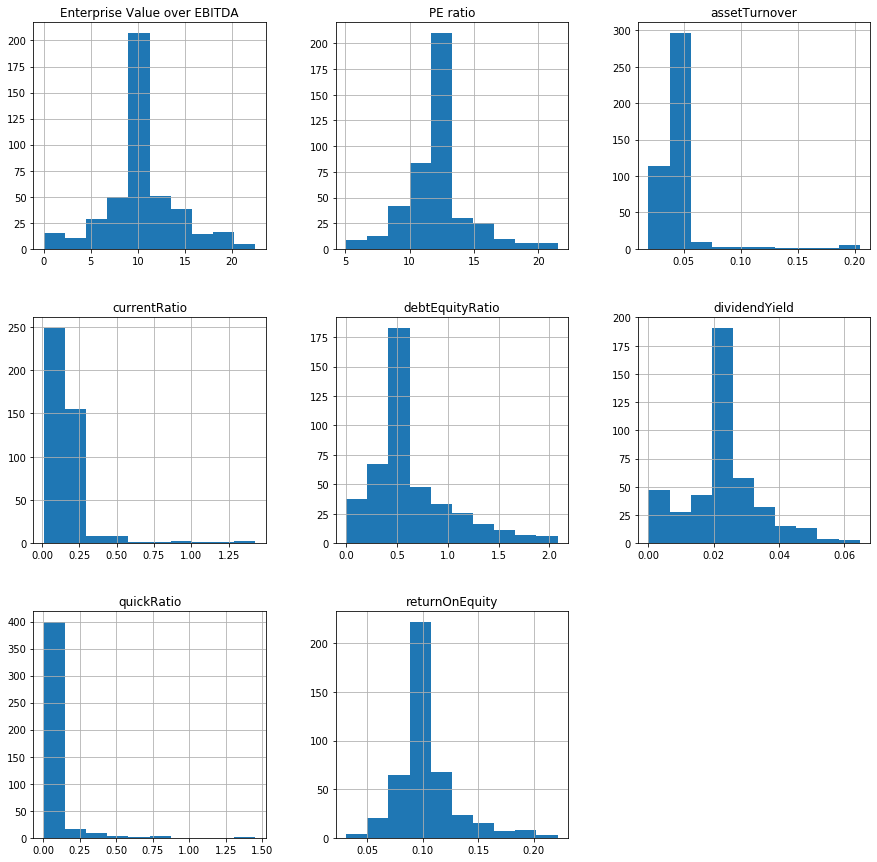

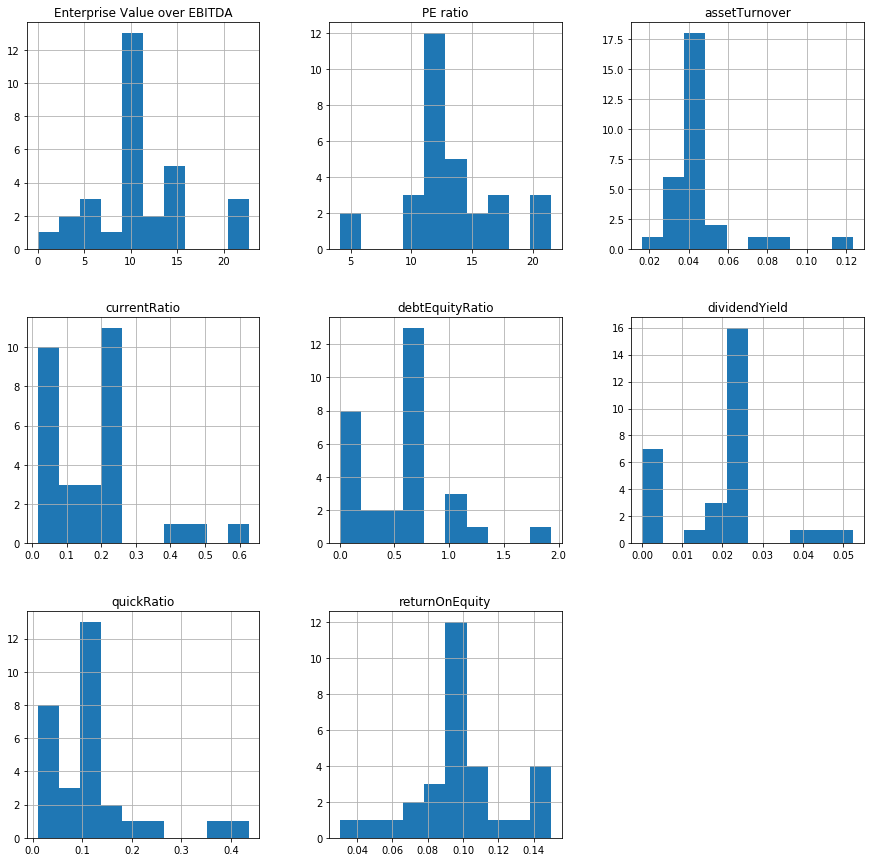

<Figure size 1080x1080 with 0 Axes>

In [35]:

df_fin_no_out.groupby('Class').hist(figsize=(15,15))
plt.figure(figsize=(15,15))
plt.show()

In [36]:
results_fin_stat = pd.DataFrame({'MEAN': df_fin_no_out.mean().round(3),'STANDARD DEVIATION':df_fin_no_out.std().round(3),\
                        'SKEWNESS':df_fin_no_out.skew().round(3),'KURTOSIS':df_fin_no_out.kurtosis().round(3),\
                        'Variance':np.var(df_fin_no_out).round(3) })
results_fin_stat

,MEAN,STANDARD DEVIATION,SKEWNESS,KURTOSIS,Variance
dividendYield,0.02,0.01,0.19,0.81,0.00
currentRatio,0.16,0.19,3.88,19.32,0.04
assetTurnover,0.05,0.02,5.26,32.08,0.00
debtEquityRatio,0.66,0.39,1.04,1.55,0.15
quickRatio,0.11,0.13,5.61,44.54,0.02
Enterprise Value over EBITDA,10.76,3.88,-0.08,1.31,15.04
PE ratio,12.04,2.54,0.80,2.60,6.45
returnOnEquity,0.10,0.03,1.29,3.43,0.00


**From the above table we have seen that the lowest standard deviation is the dividend yield ratio which
is 1% of the deviation from its mean. That says that when I look into a stock there are lot of risks involved in it.
There are many ratios which I could look into. 
But when we have the standard deviation of the ratio which is minimum it says that the volatility of 
the ratio of the stock is less. Because of that I could trust the ratio which has the lowest standard deviation
as the risk involved in is less.
And I would not look at the 'Enterprise Value over EBITDA' becuause the standard deviation is high and there is lot of risk involved in it.**


**From above table skweness we got that dividendYield and Enterprise Value over EBITDA are fairly symmetrically skewed because the values are from -0.5 to 0.5, that means the data is distributed evenly outwards the mean. 
Only PE ratio is moderately skewed and the remaining are all above +1. That means that more companies lies more on the positive side of the mean.**


**In the above table the kurtosis dividendYield , debtEquityRatio,  Enterprise Value over EBITDA and 
PE ratio have the normal distributed kurtosis as the values are less than 3. That means the companies 
are equally distributed. So while investing in a company we could look at these ratios.
But the remaining ratios have the Leptokurtic Distribution. Because of that there might be few
of the companies which are outliers and we cannot trust these ratios and decide the company.**


**The ratio of extreme of both the skewness and kurtosis cannot be trusted and when we invest by looking at these ratios,
there is high risks involved. 
quickRatio, assetTurnover and currentRatio cannot be looked into whie investing as there is high risk involved.**

## Class shares 
**The below are the distrition of the ratios with respect to the Class of shares
The only difference between Class A and Class B is the voting power one receives along 
with the share. A company that issues multiple levels of stock usually does so to concentrate voting power.**

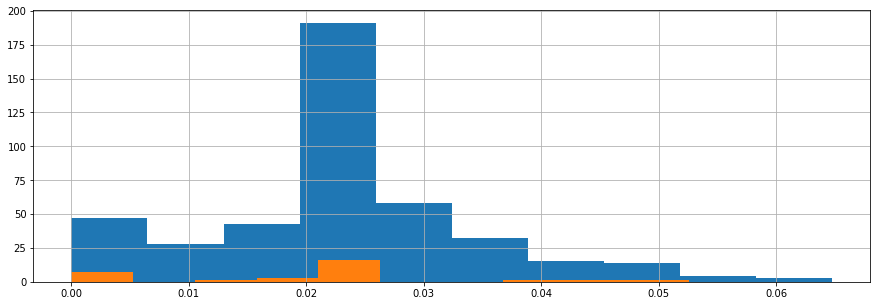

In [37]:
plt.figure(figsize =(15, 5))
df_fin_no_out.groupby('Class').dividendYield.hist()
plt.show()

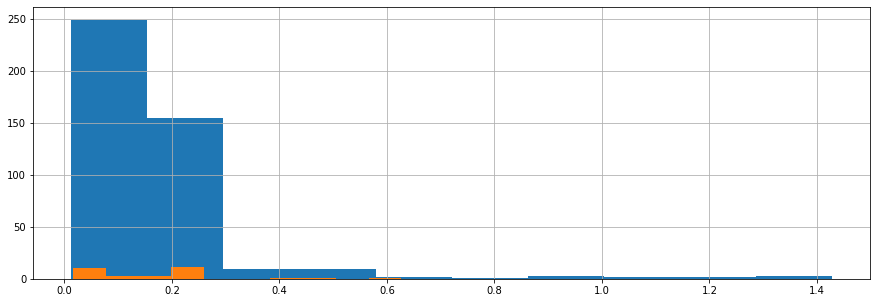

In [38]:
plt.figure(figsize =(15, 5))
df_fin_no_out.groupby('Class').currentRatio.hist()
plt.show()

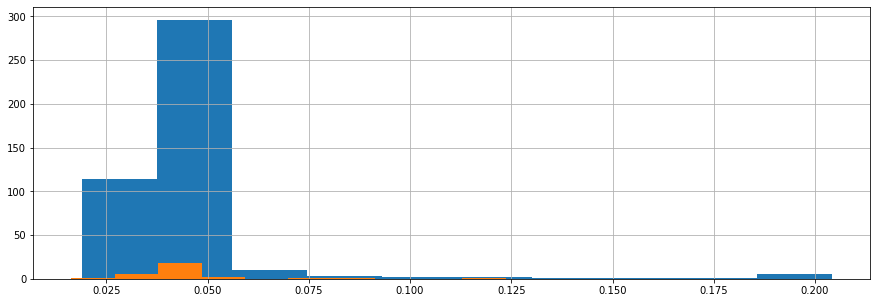

In [39]:
plt.figure(figsize =(15, 5))
df_fin_no_out.groupby('Class').assetTurnover.hist()
plt.show()

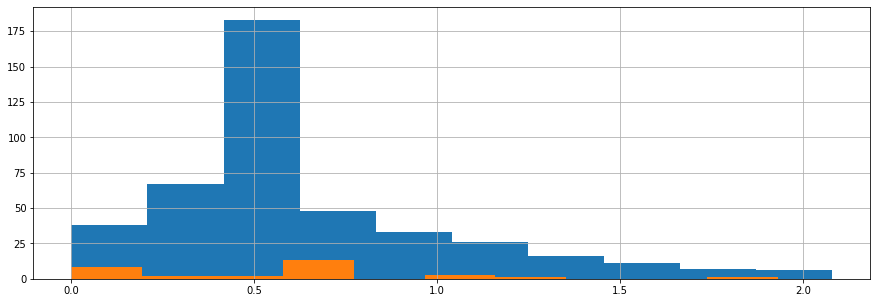

In [40]:

plt.figure(figsize =(15, 5))
df_fin_no_out.groupby('Class').debtEquityRatio.hist()
plt.show()

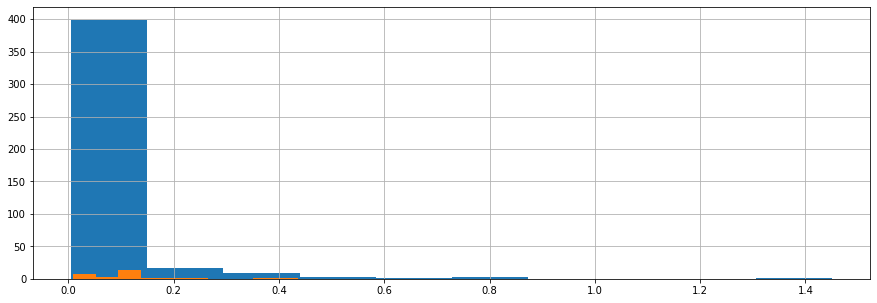

In [41]:

plt.figure(figsize =(15, 5))
df_fin_no_out.groupby('Class').quickRatio.hist()
plt.show()

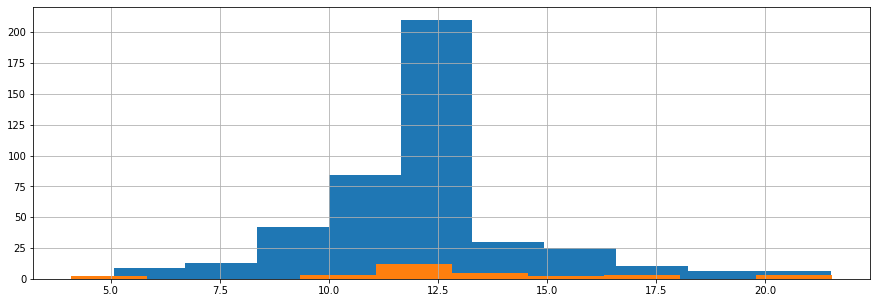

In [42]:
plt.figure(figsize =(15, 5))
df_fin_no_out.groupby('Class')['PE ratio'].hist()
plt.show()

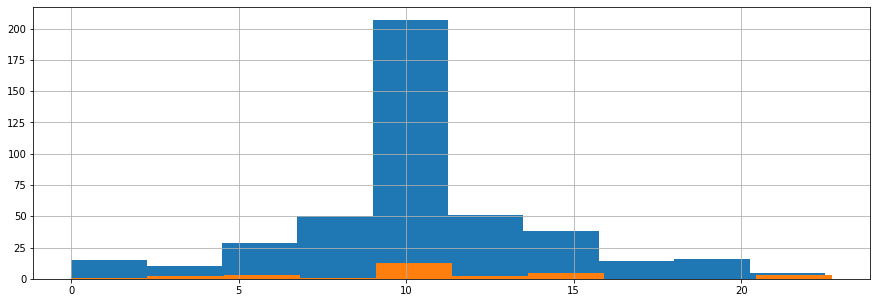

In [43]:

plt.figure(figsize =(15, 5))
df_fin_no_out.groupby('Class')['Enterprise Value over EBITDA'].hist()
plt.show()

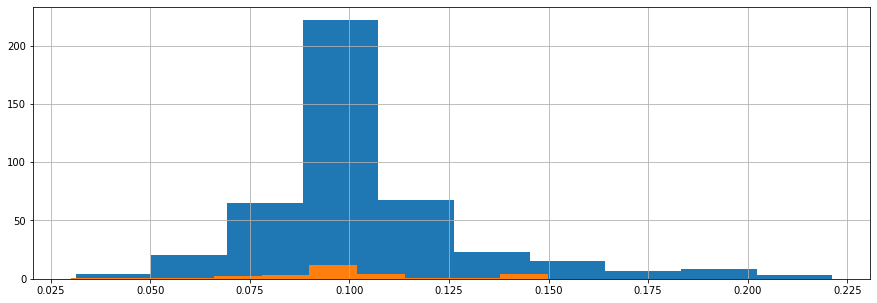

In [46]:
plt.figure(figsize =(15, 5))
df_fin_no_out.groupby('Class')['returnOnEquity'].hist()
plt.show()

**From all the above histogram it is interpreted that the Class with A has more high values than the class B. 
Class A share companies are dominating the Class B share companies.**